In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

data_path = '/Users/andreslopez/Desktop/ECE3039/Project/survey _lung_cancer.csv'
df = pd.read_csv(data_path)

xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')
xvar = df[['AGE']]
xvalue = pd.concat([df['GENDER'],xvalue], axis=1)
x_label = pd.concat([df['AGE'],xvalue], axis=1)
x_label = x_label.columns
xvalue = pd.get_dummies(xvalue)
X = pd.concat([xvar,xvalue], axis=1)
X = X.astype(int)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_kfold_model = LogisticRegression(max_iter=1000)
logistic_kfold_model.fit(X, y)

/var/folders/wh/5rf3n2rs4875gpzdn9xgsbnw0000gn/T/ipykernel_58633/2674477097.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')


LogisticRegression(max_iter=1000)

In [7]:
# k-fold Cross validation
fold_scores = cross_val_score(logistic_kfold_model, X, y, cv = 30)
print(f'\n\nk-Fold Accuracy Scores: {fold_scores}')
print(f'\nk-Fold Mean Accuracy: {np.mean(fold_scores)}')



k-Fold Accuracy Scores: [0.81818182 1.         0.81818182 0.90909091 0.81818182 1.
 0.90909091 0.90909091 0.90909091 0.9        0.9        1.
 1.         0.9        1.         0.9        1.         1.
 0.7        1.         1.         1.         0.9        1.
 0.9        0.9        0.9        0.9        1.         1.        ]

k-Fold Mean Accuracy: 0.9296969696969695


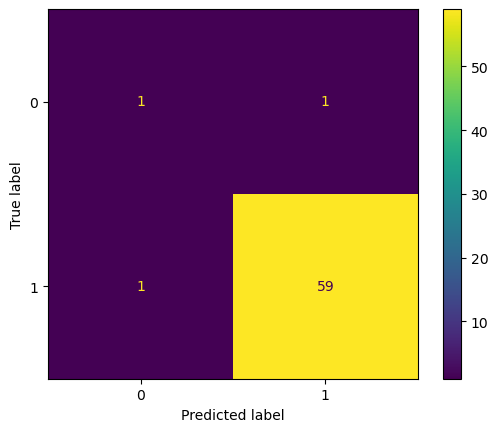


Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1_score: 0.9833333333333333


In [8]:
# Predicting the target values for the test set
y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show()

print(f'\nPrecision: {precision}')
print(f'Recall: {recall}')
print(f"F1_score: {f1}")
